In [12]:
import numpy as np
import os
import sys
sys.path.append(os.path.abspath('..'))
from preproc.dataloader import Dataloader
data  = Dataloader("../hp.csv").load()
labels = data.columns.values
X = data.to_numpy()
print(labels)

[Tue Dec 13 21:53:11 2022] [info] CSV file ../hp.csv detected.
[Tue Dec 13 21:53:11 2022] [ok] Loaded dataset in ../hp.csv, head & first 2 rows:
Index([' CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  MEDV  
0  396.9   4.98  24.0  
1  396.9   9.14  21.6  
[' CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT' 'MEDV']


In [13]:
from padding import Padding
for i, _ in enumerate(labels[:-1]):
    X = Padding(X, i, 'forestc').run()
# import pandas as pd
# pd.DataFrame(X).to_csv('./t.csv')

[Tue Dec 13 21:53:11 2022] [warn] The column(idx. 0) is not suitable for classification. Turned to RF-Regressor instead.
[Tue Dec 13 21:53:12 2022] [warn] The column(idx. 1) is not suitable for classification. Turned to RF-Regressor instead.
[Tue Dec 13 21:53:12 2022] [warn] The column(idx. 2) is not suitable for classification. Turned to RF-Regressor instead.
[Tue Dec 13 21:53:12 2022] [warn] Every data in this column(idx. 4) has a value. Skipped.
[Tue Dec 13 21:53:12 2022] [warn] Every data in this column(idx. 5) has a value. Skipped.
[Tue Dec 13 21:53:12 2022] [warn] The column(idx. 6) is not suitable for classification. Turned to RF-Regressor instead.
[Tue Dec 13 21:53:12 2022] [warn] Every data in this column(idx. 7) has a value. Skipped.
[Tue Dec 13 21:53:12 2022] [warn] Every data in this column(idx. 8) has a value. Skipped.
[Tue Dec 13 21:53:12 2022] [warn] Every data in this column(idx. 9) has a value. Skipped.
[Tue Dec 13 21:53:12 2022] [warn] Every data in this column(idx. 1

In [14]:
from normalization import Norm
for i, _ in enumerate(labels[:-1]):
    if i == 3:
        continue
    X = Norm(X, i, 'zscore').run()
# import pandas as pd
# pd.DataFrame(X).to_csv('./t.csv')

In [15]:
from sifting import Sifting
idx = len(labels) - 1
X = Sifting(X, 'if', idx).run()
# import pandas as pd
# pd.DataFrame(X).to_csv('./t.csv')

In [37]:
from feature_selection import FeatureSelection
fs = FeatureSelection(X[:, :-1], labels[:-1], X[:, -1], 'forest').run()
fs

[('LSTAT', 0.5598600933475201),
 ('RM', 0.48781583677461615),
 ('NOX', 0.459731918146023),
 ('INDUS', 0.45578441421143345),
 ('PTRATIO', 0.4168144539445483),
 ('TAX', 0.3475833815372534),
 (' CRIM', 0.312233932411149),
 ('RAD', 0.28912019021215507),
 ('ZN', 0.10762047395776939),
 ('B', 0.07078145074232581),
 ('AGE', 0.052788986156019825),
 ('CHAS', -0.010731181222182407),
 ('DIS', -0.13226546477393386)]

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

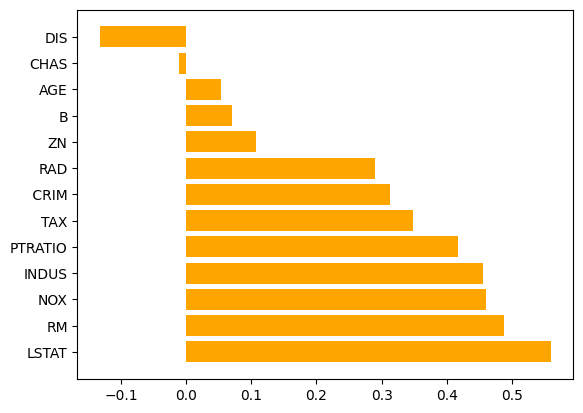

In [41]:
import matplotlib.pyplot as plt
for f in fs:
    plt.barh(f[0], f[1], color='orange')
plt.savefig()